In [22]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
import torchvision
import torch

In [23]:
a = torch.linspace(0, 255, 256)
b = torch.tensor([[0, 1, 2], [1, 2, 3]], dtype=torch.int32)
c = a[b]

In [24]:
c

tensor([[0., 1., 2.],
        [1., 2., 3.]])

In [131]:
train_data = torchvision.datasets.MNIST("./", train=True, transform=transforms.ToTensor(), download=True)

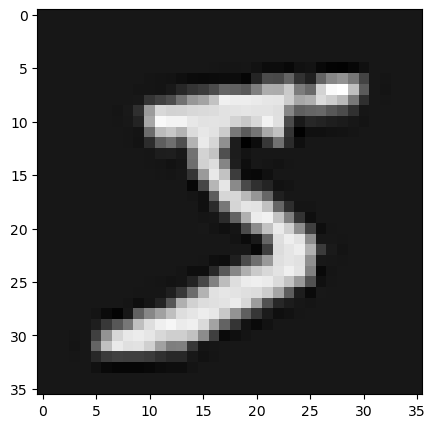

In [132]:
x = train_data[0][0].view(1, 1, 28, 28)
x = F.interpolate(x, size=36, mode="bicubic")
x = x[0, 0]
plt.imshow(x, cmap="gray")
plt.show()

In [133]:
h, w = x.size()

f = torch.fft.rfft2(x, s=(h, w), norm='ortho')
f_l = f.clone()
f[..., :h//4+1, :w//4+1] = 0
f[..., -h//4:, :w//4+1] = 0
f_l[..., h//4+1:-h//4, :] = 0
f_l[..., w//4+1:] = 0
x_recon = torch.fft.irfft2(f, s=(h, w), norm='ortho')
x_recon_l = torch.fft.irfft2(f_l, s=(h, w), norm='ortho')
x_r = x_recon + x_recon_l
f_new = torch.fft.rfft2(x_recon, s=(h, w), norm='ortho')

In [134]:
a = torch.fft.fftfreq(h, 1/h)
a

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17., -18., -17., -16., -15., -14., -13.,
        -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])

In [135]:
a[:h//4+1] = 0
a[-h//4:] = 0
a

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17., -18., -17., -16., -15., -14., -13.,
        -12., -11., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [136]:
b = torch.fft.rfftfreq(w, 1/w)
b

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.])

In [137]:
b[:w//4+1] = 0
b

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.])

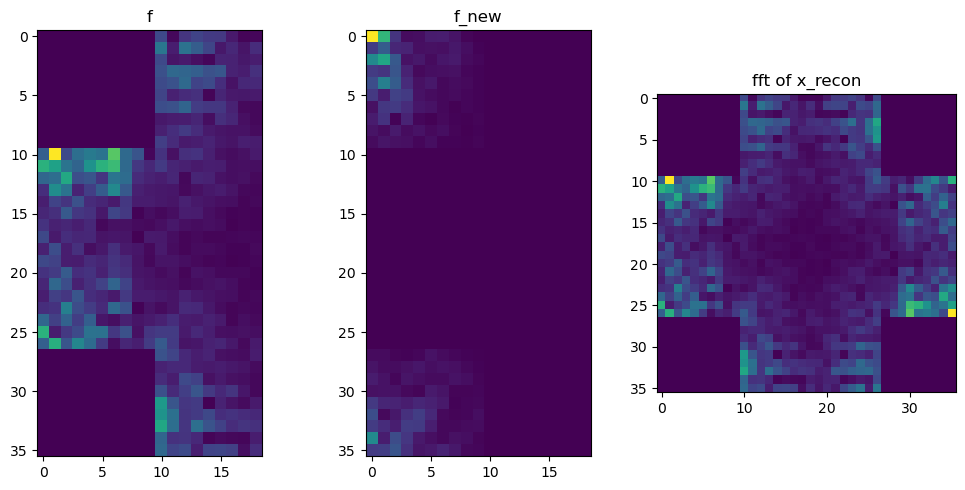

In [138]:
plt.rcParams["figure.figsize"] = (10, 5)

plt.subplot(1, 3, 1)
plt.imshow(np.abs(f))
plt.title('f')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(f_l))
plt.title('f_new')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(np.fft.fft2(x_recon)))
plt.title('fft of x_recon')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

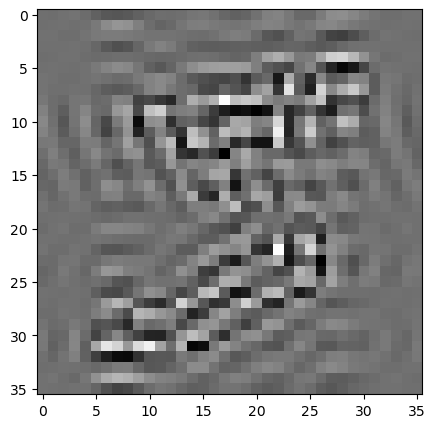

In [139]:
plt.imshow(x_recon, cmap="gray")
plt.show

In [140]:
print(torch.max(torch.abs(x - x_r)))

tensor(2.3842e-07)
